# Machine Learning Modeling Using the Normal Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

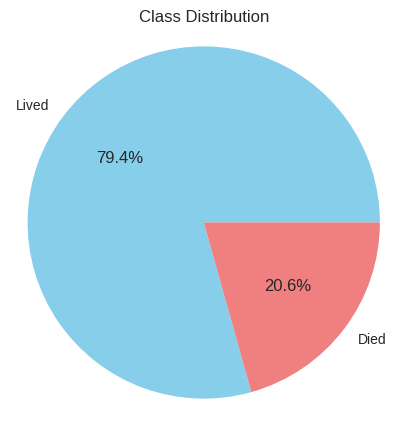

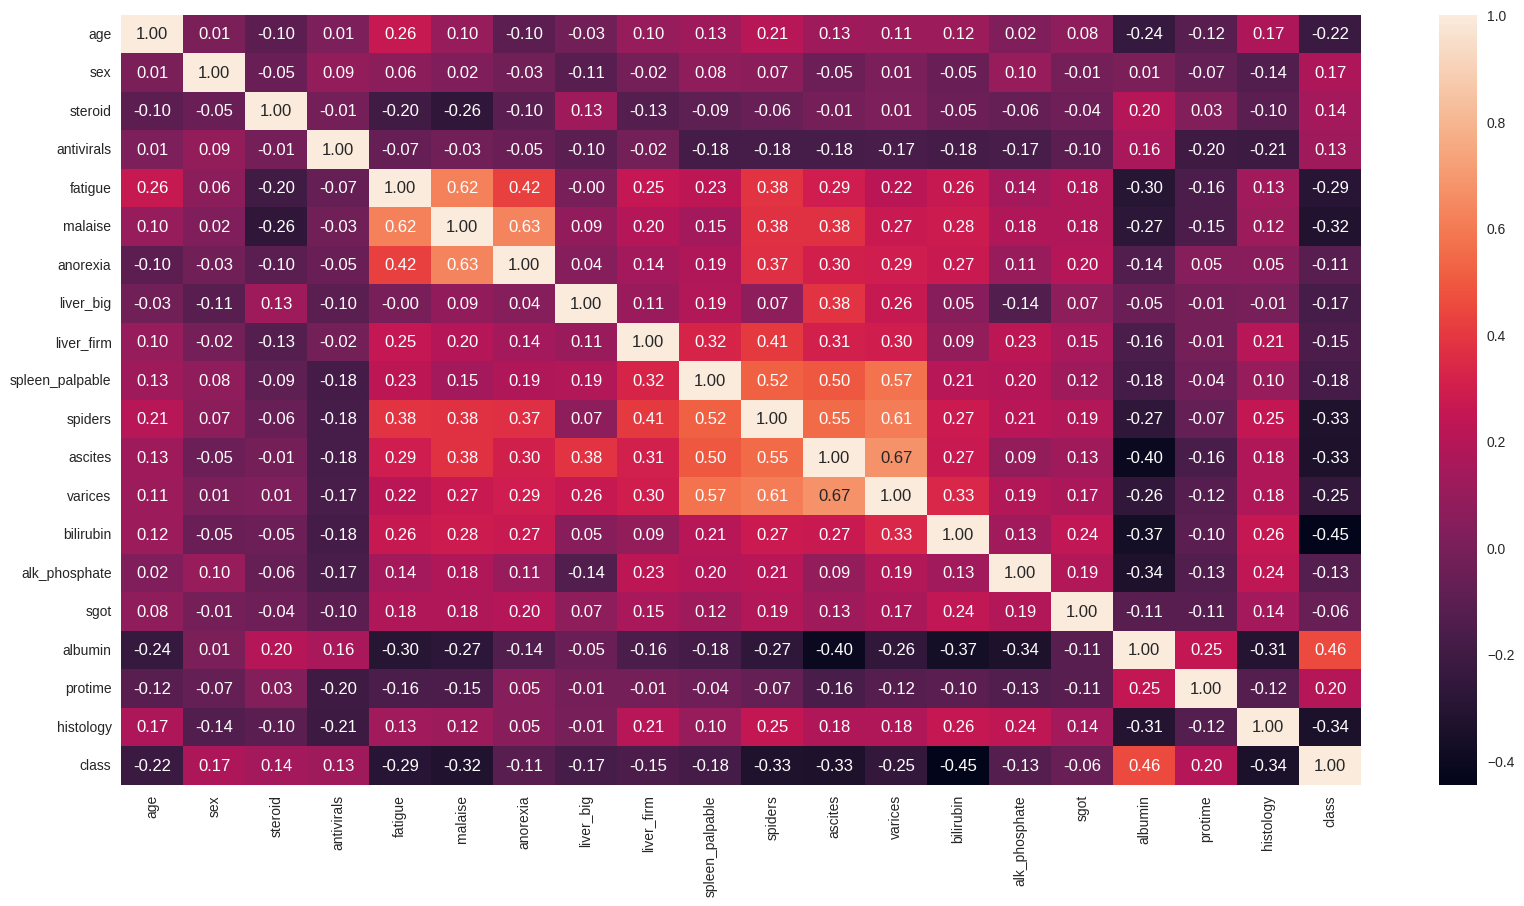

In [1]:
# Ensure matplotlib plots are displayed inline
%matplotlib inline

# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pycaret
from pycaret.classification import *

# Import custom module for EDA
from EDA_Optimized import *


In [2]:
#!pip install --upgrade pycaret scikit-learn

### Instantiate and fit SMOTE

In [3]:
train_data = pd.concat([X, y], axis=1)
s = setup(data=train_data, target='class', session_id=123, normalize=True)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Original data shape,"(155, 20)"
4,Transformed data shape,"(155, 20)"
5,Transformed train set shape,"(108, 20)"
6,Transformed test set shape,"(47, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


In [4]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8718,0.7931,0.9667,0.8856,0.9239,0.5079,0.5309,0.0280
rf,Random Forest Classifier,0.8536,0.8722,0.9444,0.8831,0.9109,0.4894,0.5164,0.0470
et,Extra Trees Classifier,0.8527,0.8444,0.9306,0.8917,0.9072,0.5009,0.5277,0.0380
gbc,Gradient Boosting Classifier,0.8255,0.8458,0.8972,0.8913,0.8908,0.4205,0.4351,0.0340
lightgbm,Light Gradient Boosting Machine,0.8255,0.8444,0.9083,0.8883,0.8923,0.4252,0.4565,0.1790
ridge,Ridge Classifier,0.8173,0.8229,0.8972,0.8821,0.8864,0.3805,0.3932,0.0090
dt,Decision Tree Classifier,0.8164,0.7653,0.8639,0.9144,0.8789,0.4773,0.4987,0.0090
lr,Logistic Regression,0.8082,0.8160,0.8861,0.8807,0.8799,0.3648,0.3783,0.3450
knn,K Neighbors Classifier,0.8073,0.8031,0.8972,0.8710,0.8805,0.3420,0.3598,0.0130
lda,Linear Discriminant Analysis,0.7991,0.8229,0.8750,0.8789,0.8725,0.3536,0.3676,0.0090


In [5]:
best_model

AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)

## Evaluate the best model

In [6]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Plot various aspects of the best model

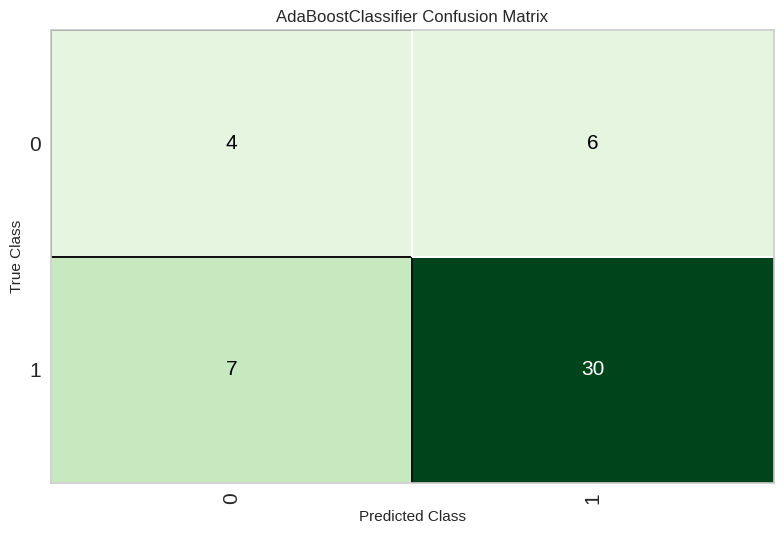

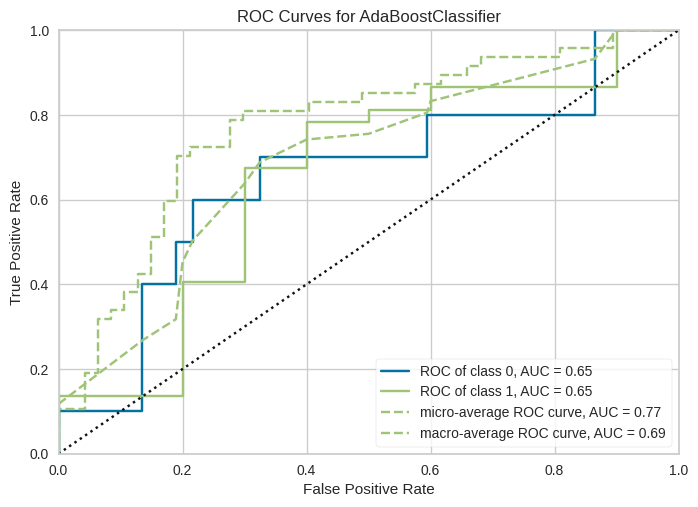

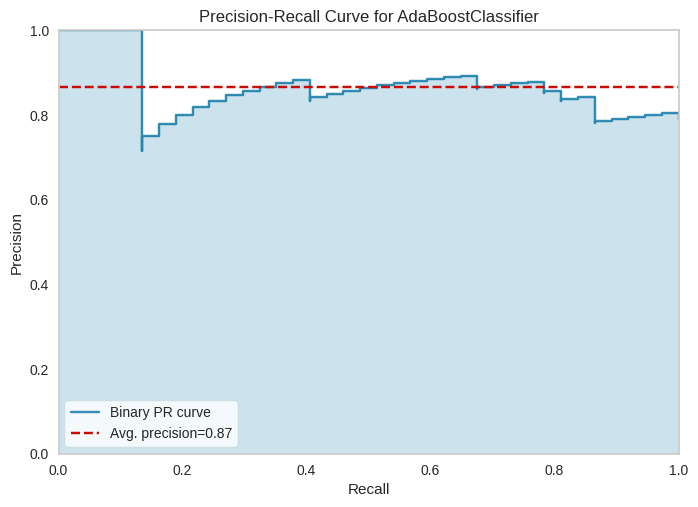

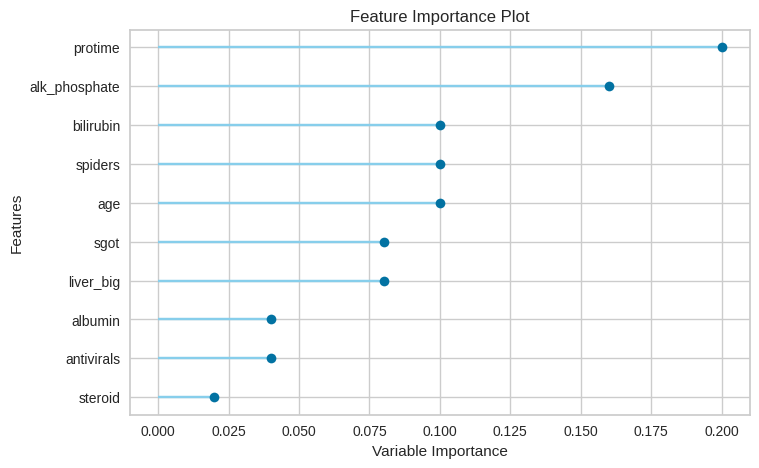

In [7]:
plot_model(best_model, plot='confusion_matrix')
plot_model(best_model, plot='auc')
plot_model(best_model, plot='pr')
plot_model(best_model, plot='feature')

### Making Predictions

In [8]:
predictions = predict_model(best_model)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.7234,0.6541,0.8108,0.8333,0.8219,0.2034,0.2038


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,...,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class,prediction_label,prediction_score
122,42,0,1,0,0,0,0,1,0,1,...,0,1.5,85.0,40.0,4.0,100.0,1,1,1,0.5537
44,34,0,1,0,0,0,0,1,0,0,...,0,1.0,85.0,86.0,4.0,100.0,0,1,1,0.5535
112,52,0,0,0,1,0,0,1,0,0,...,0,1.0,85.0,30.0,4.0,100.0,1,1,1,0.5444
75,32,0,0,1,1,1,0,1,0,0,...,0,1.0,55.0,45.0,4.1,56.0,0,1,1,0.6094
150,46,0,1,0,1,1,1,1,0,0,...,1,7.6,85.0,242.0,3.3,50.0,1,0,1,0.6573


### Displaying the probability of both classes

In [9]:
predictions_prob = predict_model(best_model, raw_score=True)
predictions_prob.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.7234,0.6541,0.8108,0.8333,0.8219,0.2034,0.2038


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,...,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class,prediction_label,prediction_score_0,prediction_score_1
122,42,0,1,0,0,0,0,1,0,1,...,1.5,85.0,40.0,4.0,100.0,1,1,1,0.4463,0.5537
44,34,0,1,0,0,0,0,1,0,0,...,1.0,85.0,86.0,4.0,100.0,0,1,1,0.4465,0.5535
112,52,0,0,0,1,0,0,1,0,0,...,1.0,85.0,30.0,4.0,100.0,1,1,1,0.4556,0.5444
75,32,0,0,1,1,1,0,1,0,0,...,1.0,55.0,45.0,4.1,56.0,0,1,1,0.3906,0.6094
150,46,0,1,0,1,1,1,1,0,0,...,7.6,85.0,242.0,3.3,50.0,1,0,1,0.3427,0.6573


# Save the best model

In [10]:
save_model(best_model, "normal_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'sex', 'steroid',
                                              'antivirals', 'fatigue', 'malaise',
                                              'anorexia', 'liver_big',
                                              'liver_firm', 'spleen_palpable',
                                              'spiders', 'ascites', 'varices',
                                              'bilirubin', 'alk_phosphate',
                                              'sgot', 'albumin', 'protime',
                                              'histology'],
                                     transformer=SimpleImputer(add_indica...
                                                               fill_value=None,
                                                               keep_empty_features=False,
                             